In [88]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Color palettes

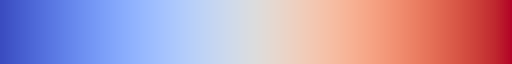

In [89]:
palette_cont = sns.color_palette("coolwarm", as_cmap=True)
palette_cont

In [90]:
palette_one_color = sns.dark_palette("#00AA00",10)
palette_one_color

[(0.13211029424631612, 0.15348624836493982, 0.13209326518836167),
 (0.11760406585848533, 0.20983547076669806, 0.1175889066578749),
 (0.10309783747065454, 0.2661846931684563, 0.10308454812738813),
 (0.08807352949754409, 0.3245463877988487, 0.08806217679224113),
 (0.0735673011097133, 0.38089561020060697, 0.07355781826175434),
 (0.05854299313660283, 0.43925730483099945, 0.058535446926607324),
 (0.04403676474877205, 0.49560652723275767, 0.04403108839612056),
 (0.029012456775661583, 0.5539682218631501, 0.02900871706097355),
 (0.014506228387830791, 0.6103174442649083, 0.014504358530486774),
 (0.0, 0.6666666666666666, 0.0)]

In [91]:
palette_bipolar = sns.diverging_palette(0,180,n=10)
palette_bipolar

[(0.8340245009323628, 0.237592525883977, 0.413389203308121),
 (0.8596050363244643, 0.39280222331536574, 0.5301079808304767),
 (0.8851855717165659, 0.5480119207467544, 0.6468267583528324),
 (0.9121347085767019, 0.7115255968283857, 0.7697901858723735),
 (0.9377152439688033, 0.8667352942597744, 0.8865089633947292),
 (0.8475964439140566, 0.9033581143692396, 0.8959086275292937),
 (0.6971068958070079, 0.8064816296715287, 0.7933544443589688),
 (0.5385659049406047, 0.7044220908608753, 0.6853134407023411),
 (0.38807635683355596, 0.6075456061631642, 0.5827592575320164),
 (0.23758680872650734, 0.5106691214654533, 0.48020507436169163)]

In [92]:
colors = ['#d55e00', '#009e73', '#0072b2', '#f0e442', '#000000', '#ffffff', '#e69f00', '#56b4e9', '#cc79a7']
palette_Custom = sns.color_palette(colors)
palette_Custom

[(0.8352941176470589, 0.3686274509803922, 0.0),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 (0.0, 0.0, 0.0),
 (1.0, 1.0, 1.0),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.8, 0.4745098039215686, 0.6549019607843137)]

# Graphs

In [93]:
Ayush_college   = pd.read_csv("MergerdAyush_Colleges_in_India_01-04-2021_0.csv")
Agro_stocks     = pd.read_csv("Production_of_Agriculture_Stock-Ministry_of_Finance.csv")
Road_Transport  = pd.read_csv("Road_Transport_BRS_2017-18_Annexure7_9c.csv")

# Monthly changes in different food grain stocks.

In [94]:
values = Agro_stocks.drop(columns=["Particulars","Frequency","Unit"]).values

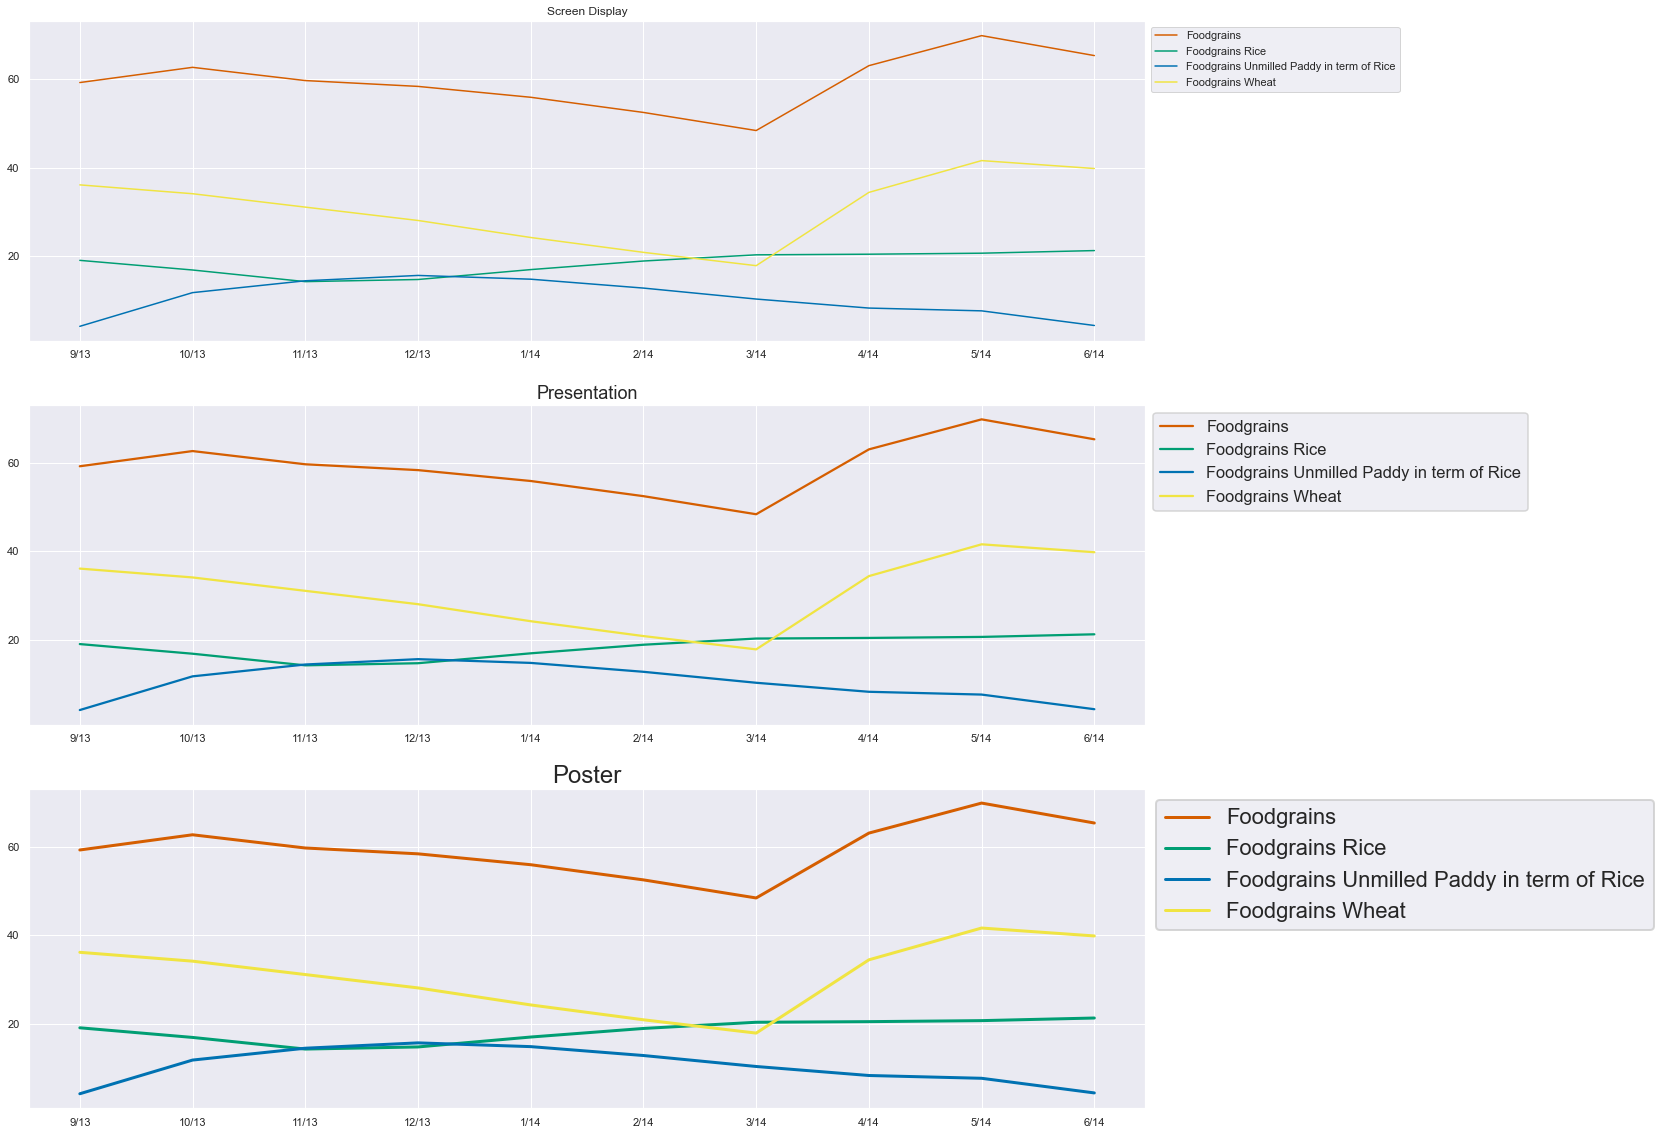

In [97]:
sns.set_palette(palette_Custom)
fig, ax = plt.subplots(3,1, figsize=(20,20))

months = ['9/13','10/13','11/13','12/13','1/14','2/14','3/14','4/14','5/14','6/14']

# first graph
sns.set_context("notebook")
for i, content in enumerate(values):
    ax[0].plot(months, content, label=Agro_stocks["Particulars"][i])
ax[0].set_title("Screen Display")
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# second graph
sns.set_context("talk")
for i, content in enumerate(values):
    ax[1].plot(months, content, label=Agro_stocks["Particulars"][i])
ax[1].set_title("Presentation")
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# third graph
sns.set_context("poster")
for i, content in enumerate(values):
    ax[2].plot(months, content, label=Agro_stocks["Particulars"][i])
ax[2].set_title("Poster")
ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# State wise Colleges of different Ayus Category.

In [150]:
college_types = list(Ayush_college['Type of System'].unique())
states = list(Ayush_college['State or Union Territory'].unique())

Ayush_college[Ayush_college['Type of System'] == college_types[0]].sort_values(by=['State or Union Territory'], ascending=True)

columns = [[0 for i in states] for j in college_types]
for i,types in enumerate(college_types):
    for j in list(Ayush_college[Ayush_college['Type of System'] == types].sort_values(by=['State or Union Territory'], ascending=True)[['State or Union Territory','No. of Colleges - Govt']].values):
        columns[i][states.index(j[0])] = j[1]

columns = np.array(columns).T

In [151]:
Ayush_data = pd.DataFrame(columns, columns=college_types, index=states).reset_index()
Ayush_data["total"] = Ayush_data.sum(axis=1)
Ayush_data = Ayush_data.sort_values(by=['total'], ascending=True)

C:\Users\rohit\AppData\Local\Temp\ipykernel_16960\794908820.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Ayush_data["total"] = Ayush_data.sum(axis=1)


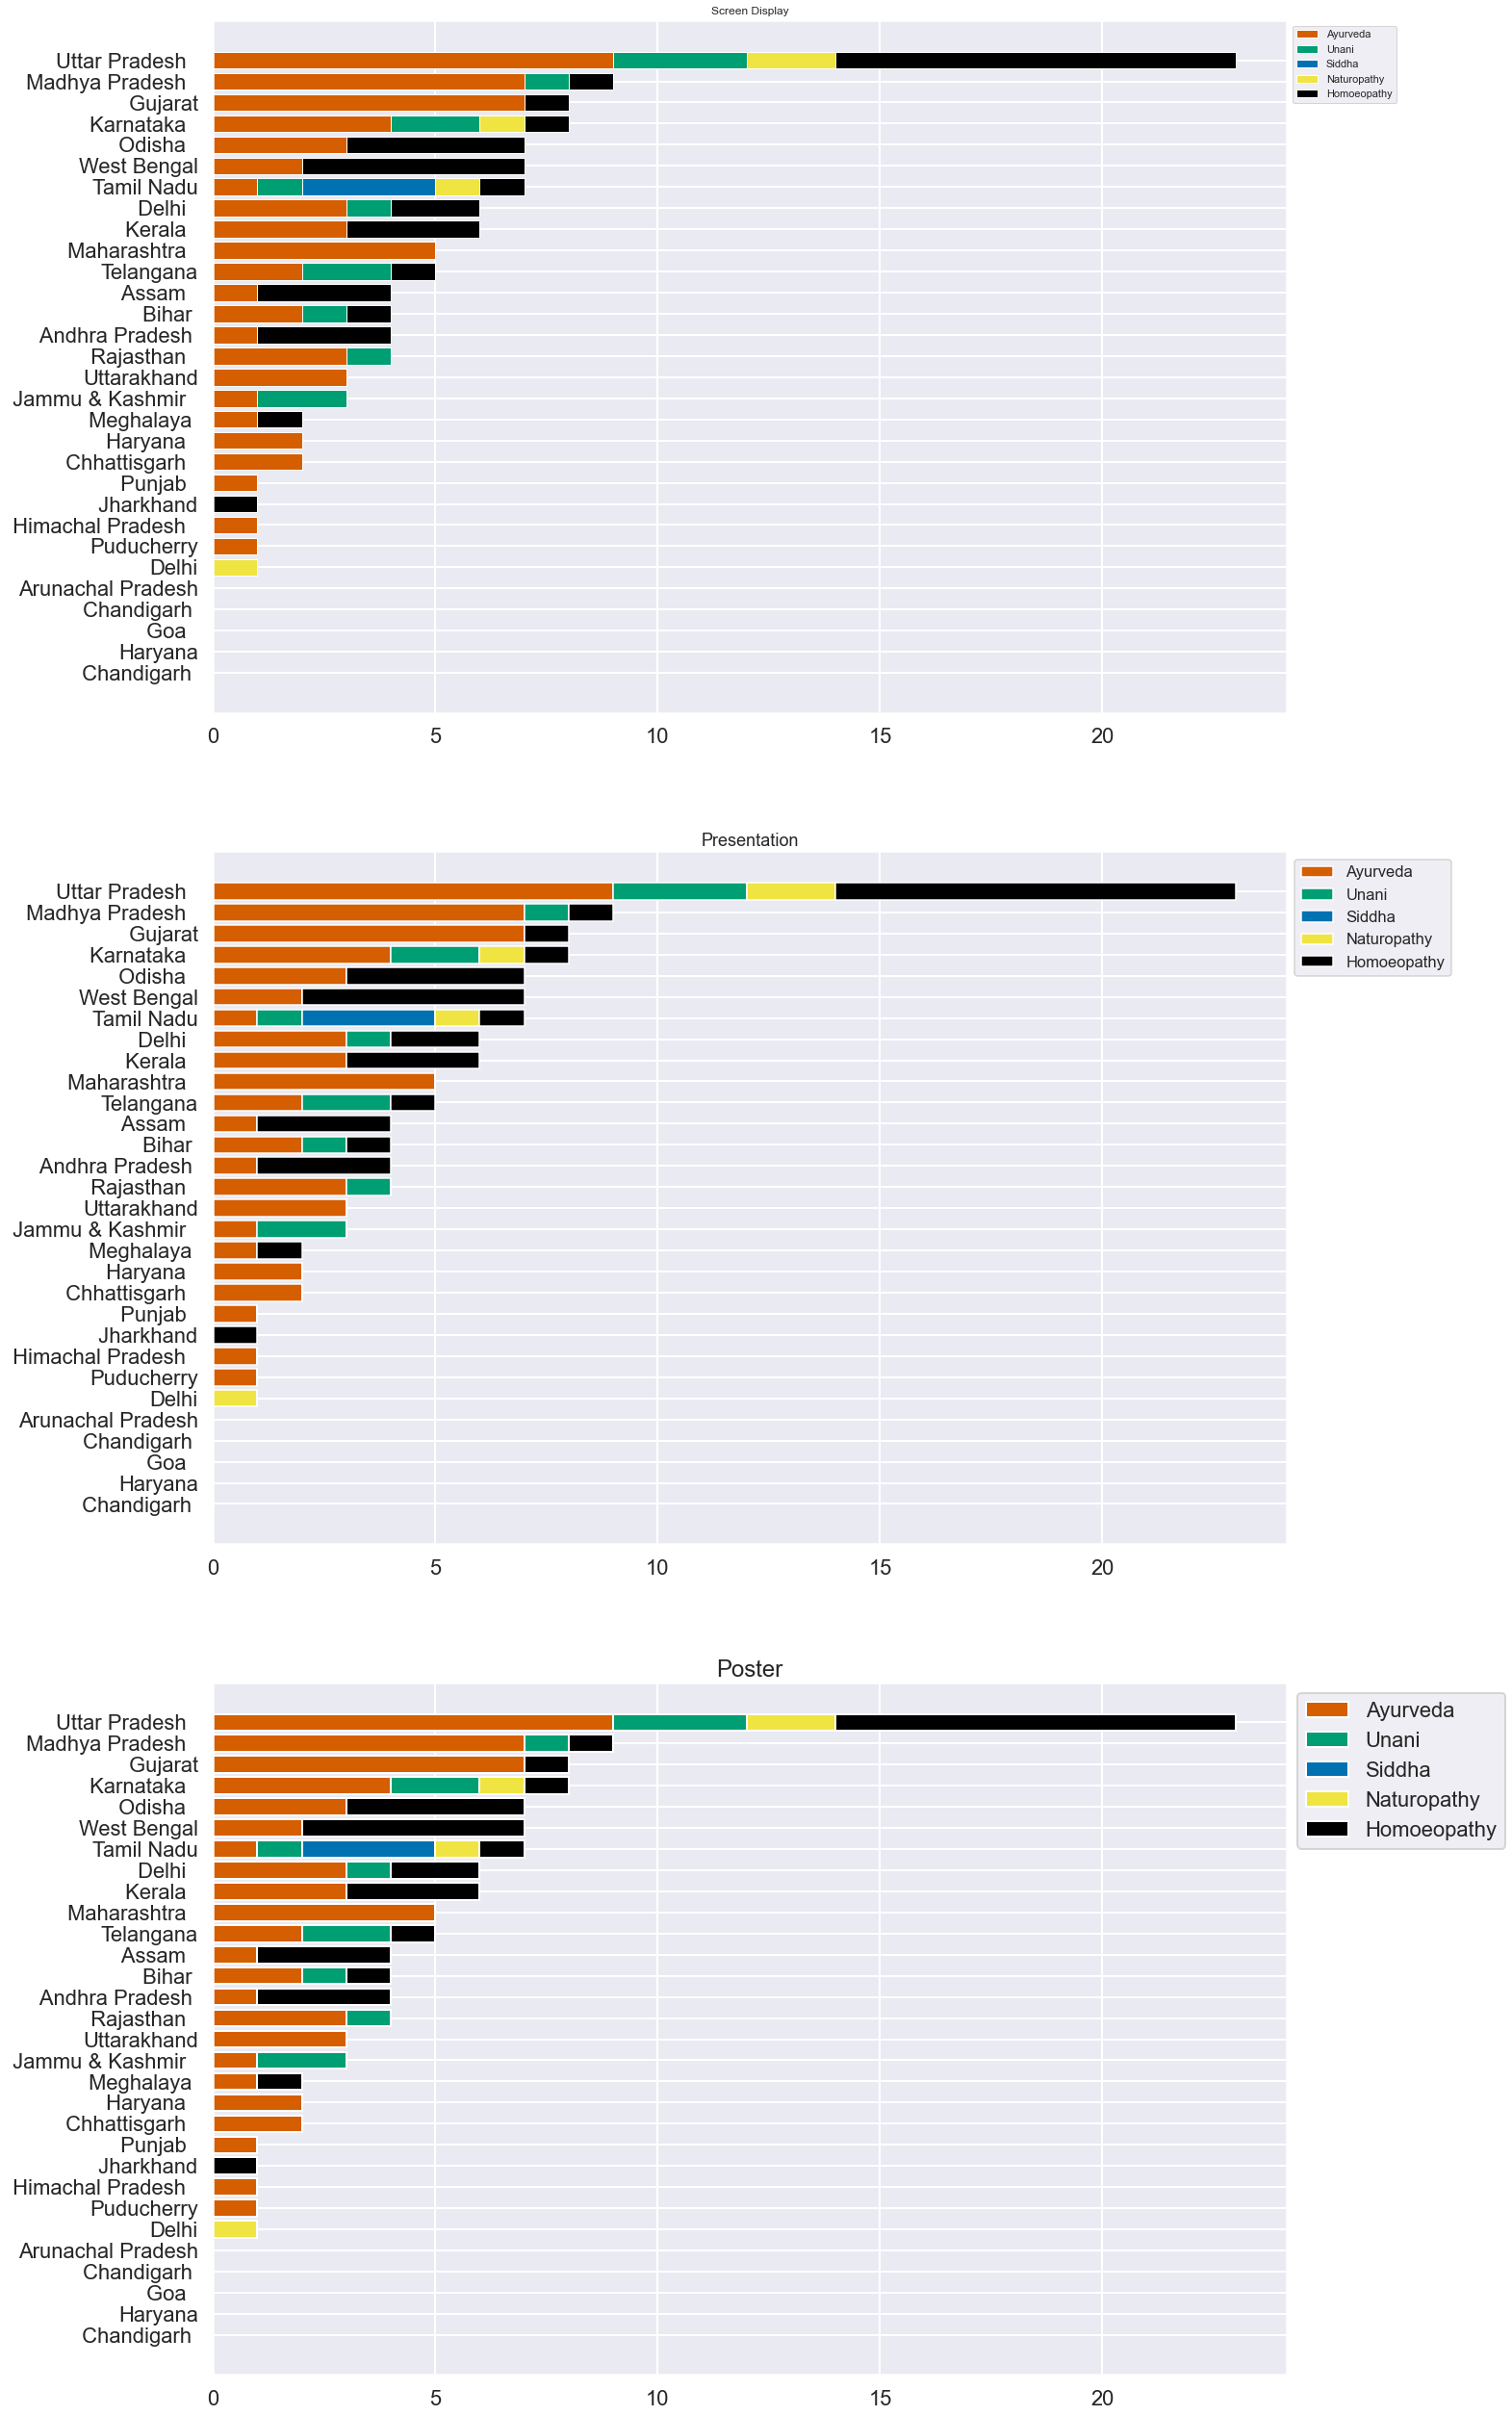

In [159]:
sns.set_palette(palette_Custom)
fig, ax = plt.subplots(3,1, figsize=(20,45))

# Ayush_college.groupby(by="State/UT")

# first graph
sns.set_context("notebook")

last = np.zeros(len(states))
for i in range(5):
    ax[0].barh(Ayush_data["index"], Ayush_data[Ayush_data.columns[1+i]], left=last, label=college_types[i])
    last += Ayush_data[Ayush_data.columns[1+i]]

ax[0].set_title("Screen Display")
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# second graph
sns.set_context("talk")
last = np.zeros(len(states))
for i in range(5):
    ax[1].barh(Ayush_data["index"], Ayush_data[Ayush_data.columns[1+i]], left=last, label=college_types[i])
    last += Ayush_data[Ayush_data.columns[1+i]]

ax[1].set_title("Presentation")
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# third graph
sns.set_context("poster")
last = np.zeros(len(states))
for i in range(5):
    ax[2].barh(Ayush_data["index"], Ayush_data[Ayush_data.columns[1+i]], left=last, label=college_types[i])
    last += Ayush_data[Ayush_data.columns[1+i]]

ax[2].set_title("Poster")
ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Distribution of National, State and District roads.

In [180]:
new_road = pd.melt(Road_Transport.iloc[:35], id_vars=['Name of the States'], value_vars=['National Highways', 'State Highways', 'District Roads']).sort_values(by=['value'], ascending=False)

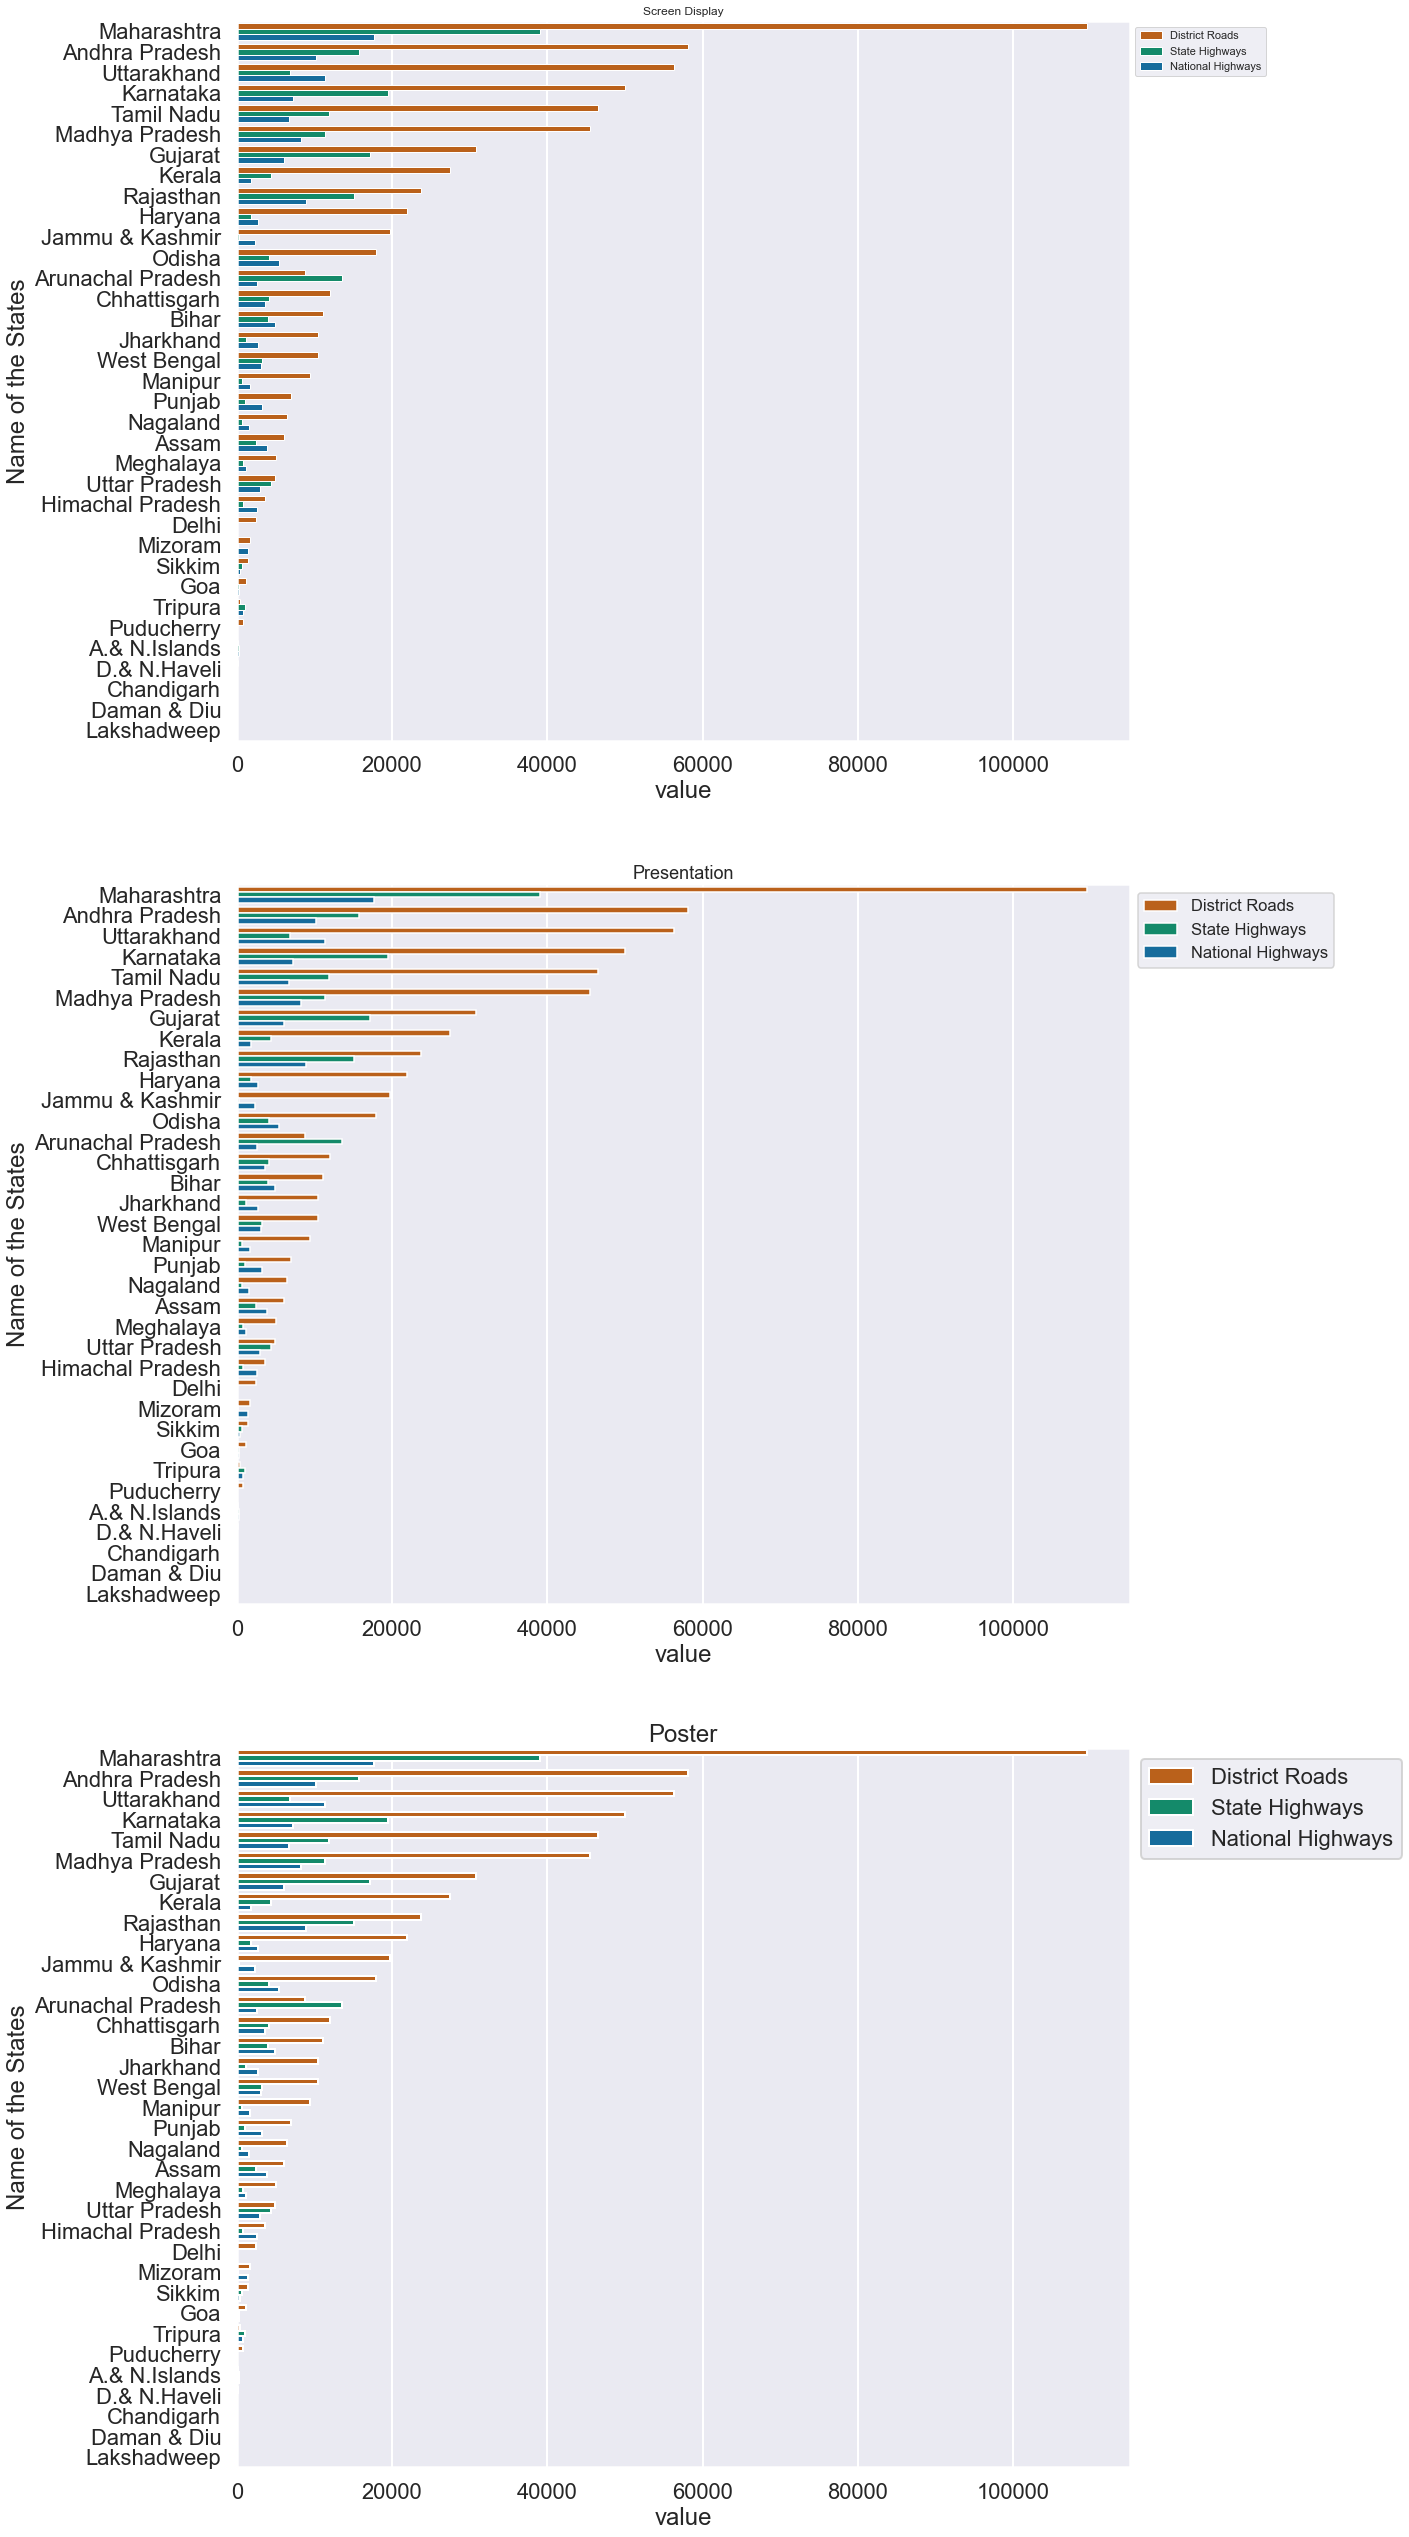

In [189]:
sns.set_palette(palette_Custom)
fig, ax = plt.subplots(3,1, figsize=(16,45))

# Ayush_college.groupby(by="State/UT")

# first graph
sns.set_context("notebook")

last = np.zeros(len(states))
sns.barplot(x="value", y="Name of the States", hue="variable", data=new_road, palette=palette_Custom, ax=ax[0])

ax[0].set_title("Screen Display")
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# second graph
sns.set_context("talk")
sns.barplot(x="value", y="Name of the States", hue="variable", data=new_road, palette=palette_Custom, ax=ax[1])
ax[1].set_title("Presentation")
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# third graph
sns.set_context("poster")
sns.barplot(x="value", y="Name of the States", hue="variable", data=new_road, palette=palette_Custom, ax=ax[2])

ax[2].set_title("Poster")
ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()